<a href="https://colab.research.google.com/github/Fordalo/Data_SCIENCE_WORK/blob/main/Diamonds_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [160]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


here is information on each column in this dataset

price price in US dollars (\$326 — \$18,823)

1.   **carat:** weight of the diamond (0.2–5.01)
2.   **cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
3.   **color:** diamond colour, from J (worst) to D (best)
4.   **clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
5.   **x:** length in mm (0–10.74)
6.   **y:** y width in mm (0–58.9)
7.   **z:** z depth in mm (0–31.8)
8.   **depth:** total depth percentage 
9.   **table:** width of top of diamond relative to widest point (43–95)

In [161]:
#checking for NA's, NAN
diamonds.isna().isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [162]:
diamonds['color']

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: category
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

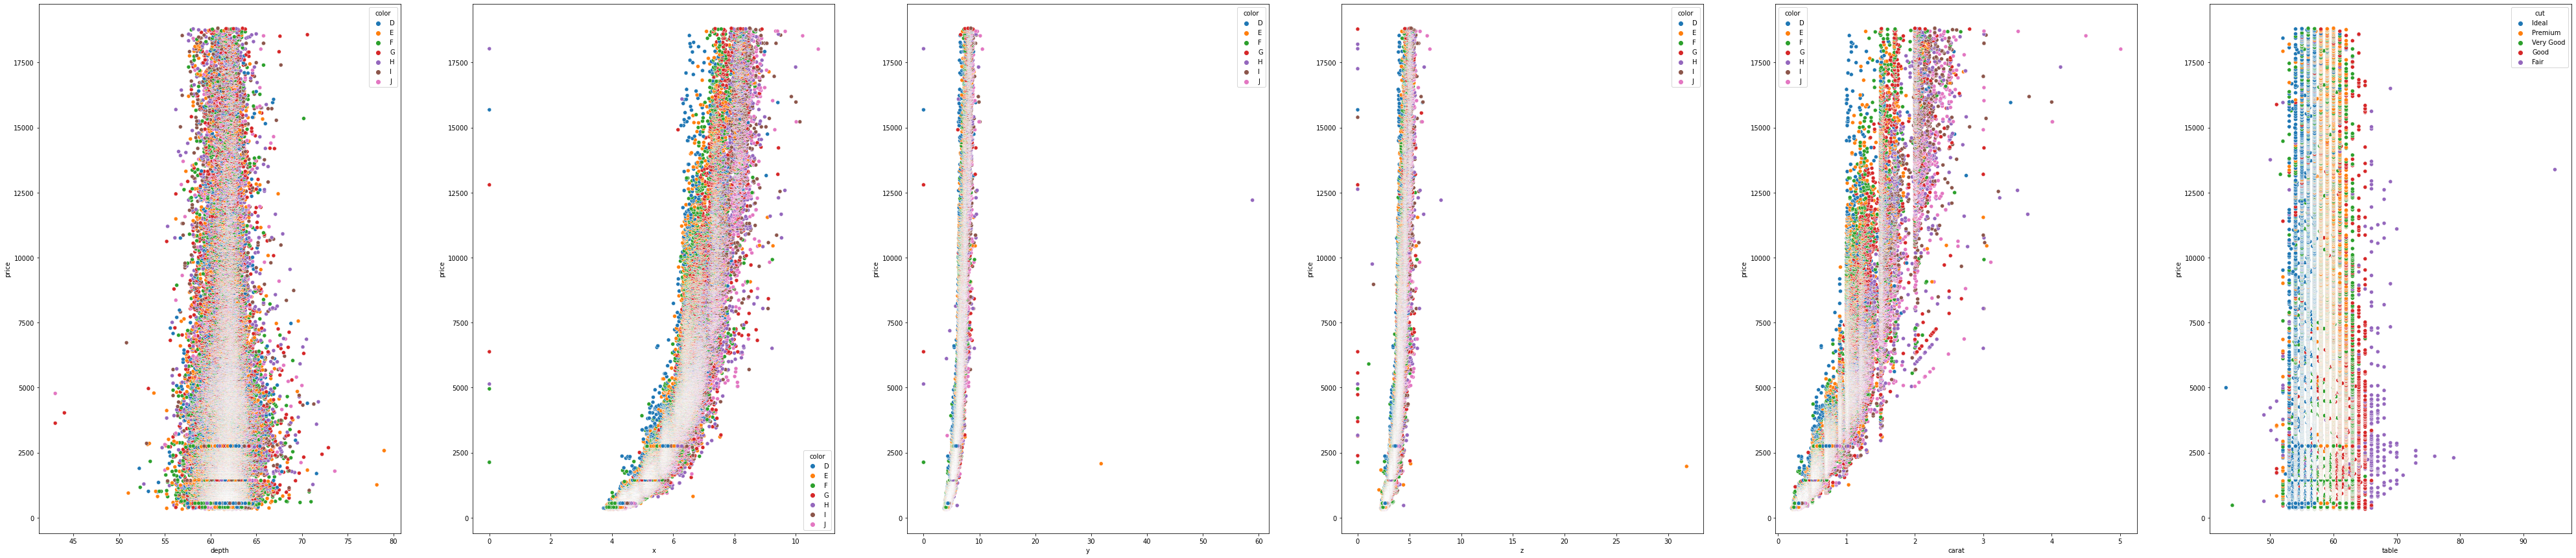

In [163]:
fig, axs = plt.subplots(ncols=6, figsize=(70,15))
sns.scatterplot(x= 'depth', y= 'price', data= diamonds, ax=axs[0], hue= diamonds['color'])
sns.scatterplot(x= 'x', y= 'price', data= diamonds, ax=axs[1], hue= diamonds['color'])
sns.scatterplot(x= 'y', y= 'price', data= diamonds, ax=axs[2], hue= diamonds['color'])
sns.scatterplot(x= 'z', y= 'price', data= diamonds, ax=axs[3], hue= diamonds['color'])
sns.scatterplot(x= 'carat', y= 'price', data= diamonds, ax=axs[4], hue= diamonds['color'])
sns.scatterplot(x= 'table', y= 'price', data= diamonds, ax=axs[5], hue= diamonds['cut'])

After visualizing and looking at our data, it is evident that small changes in size cause the price to go WAY up which makes sense.

In [164]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


To begin our polynomial regression, we will start with just one feature "carat".
Therefore our matrix will be X = [1_vec, Carat_vec, Carat_$vec^2$].

We will then split our data and then perform our regression

In [165]:
#setting up my x and y values
X_1 = diamonds.iloc[0:, 0]
Y_1 = diamonds.iloc[0:, 6]



# splitting data into train and testing set
X_train, X_test, y_train, y_test = train_test_split(X_1, Y_1, test_size=0.2, random_state=0)
print('X_train shape: {} \n X_test shape: {} \ny_train shape: {} \n y_test shape: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))


# Xinput1 = diamonds.iloc[0:, 0:5]
# Xinput2= diamonds.iloc[0:, 7:]
# Xinputfinal = pd.concat([Xinput1, Xinput2], axis=1)
# Yinput = diamonds.iloc[0:, 6]

# Xinputfinal = pd.get_dummies(Xinputfinal)


X_train shape: (43152,) 
 X_test shape: (10788,) 
y_train shape: (43152,) 
 y_test shape: (10788,)


When we transform our data to a higher order or degree our columns look like the following:

1, x1, x2, x1², x1x2, x2²

In [166]:
from sklearn.preprocessing import PolynomialFeatures

mypolyregr = PolynomialFeatures(degree=2)
X_train = X_train[:, np.newaxis]


X_poly = mypolyregr.fit_transform(X_train)
pol_reg = LinearRegression()
X_poly


#lectures 22 asymettric cross 
#14 log transform feature interactions
#16 k fold cross validation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


array([[1.    , 1.63  , 2.6569],
       [1.    , 0.34  , 0.1156],
       [1.    , 0.4   , 0.16  ],
       ...,
       [1.    , 0.32  , 0.1024],
       [1.    , 0.41  , 0.1681],
       [1.    , 0.91  , 0.8281]])

In [167]:
pol_reg.fit(X_poly, y_train)
betas = pol_reg.coef_
betas

array([   0.        , 6734.95150985,  474.30680903])

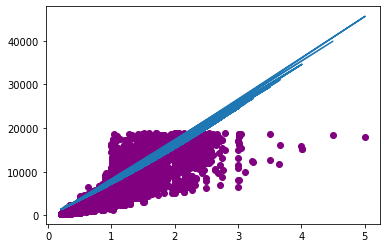

In [168]:
Predict = betas[1]* X_poly[0: ,1] + betas[2]* X_poly[0: , 2]
Predict
plt.scatter(X_train, y_train, c = "purple")
plt.plot(X_train, Predict)

Lets calculate error metrics here before we try to fit in a higher order

In [169]:
error1 = y_train - Predict
R_sq1 = (np.var(y_train) - np.var(error1))/np.var(y_train)
SSE1 = np.sum(np.square(error1))
MSE1 = 1/(len(X_train) - 2) * SSE1
RMSE1 = np.sqrt(MSE1)
print('RSQUARED: {} \nRMSE: {} \nSSE: {} \nMSE: {}'.format(R_sq1, RMSE1, SSE1, MSE1))

RSQUARED: 0.8502322913320693 
RMSE: 2411.0127624356687 
SSE: 250830196628.08417 
MSE: 5812982.540627675


In [170]:
mypolyregr2 = PolynomialFeatures(degree=2)
pol_reg2 = LinearRegression()


X_test = X_test[:, np.newaxis]
X_poly2 = mypolyregr2.fit_transform(X_test)
pol_reg2.fit(X_poly2, y_test)
betas2 = pol_reg.coef_
Predict2 = betas2[1]* X_poly2[0: ,1] + betas2[2]* X_poly2[0: , 2]
Predict2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


array([7982.35789975, 9477.3814086 , 8764.94361681, ..., 7826.97909268,
       7363.11934415, 3486.05245718])

In [171]:
error2 = y_test - Predict2
R_sq2 = (np.var(y_test) - np.var(error2))/np.var(y_test)
error2
SSE2 = np.sum(np.square(error2))
MSE2 = 1/(len(X_test - 2)) * SSE2
RMSE2 = np.sqrt(MSE2)
print('RSQUARED: {} \nRMSE: {} \nSSE: {} \nMSE: {}'.format(R_sq2, RMSE2, SSE2, MSE2))

RSQUARED: 0.8539132774712124 
RMSE: 2391.3495752764948 
SSE: 61691747511.19668 
MSE: 5718552.791175072


In [173]:
#BIC score (bayesian information criterion)
import math
k2 = 2
n2 = len(X_test)
BIC_2_ = n2 * math.log(SSE2) + (k2 * math.log(n2))
BIC_2

268050.92026361503

# SECOND ORDER, P = 2

Our R_sq is slightly higher on. the training set. These are valid error metrics for a polynomial regression model. Lets see what happens when we add another attribute. Once our data is preprocessed for fitting, it should have the following structure:

1, x1, x2, x1², x1x2, x2²


In the previous module above, we checked error metrics on our testing and training data. In this next module, we will onlty be checking OOS data. Lets fit a model with carat and depth, and increase the

In [190]:
X_2 = diamonds.iloc[0:, 0:1]
X_2_2 = diamonds.iloc[0:, 4]
X_2_final = np.column_stack((X_2, X_2_2))
Y_2 = diamonds.iloc[0:, 6]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2_final, Y_2, test_size=0.2, random_state=0)
print('X_train2 shape: {} \n X_test2 shape: {} \ny_train2 shape: {} \n y_test2 shape: {}'.format(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape))


X_train2 shape: (43152, 2) 
 X_test2 shape: (10788, 2) 
y_train2 shape: (43152,) 
 y_test2 shape: (10788,)


In [195]:
mypolyregr3 = PolynomialFeatures(degree=2)
X_poly3 = mypolyregr3.fit_transform(X_train2)
pol_reg3 = LinearRegression()
X_poly3.shape

(43152, 6)

In [198]:
pol_reg3.fit(X_poly3, y_train2)
betas3 = pol_reg3.coef_
betas

array([   0.        , 6734.95150985,  474.30680903])

In [203]:
X_poly3_test = mypolyregr3.fit_transform(X_test2)
Predict3 = pol_reg3.predict(X_poly3_test)
Predict3

array([6175.35700919, 7530.77660197, 7101.90844159, ..., 5720.65547597,
       5622.60108098, 1331.42025573])

In [204]:
error3 = y_test2 - Predict3
R_sq3 = (np.var(y_test2) - np.var(error3))/np.var(y_test2)
SSE3 = np.sum(np.square(error3))
MSE3 = 1/(len(X_test2 - 2)) * SSE3
RMSE3 = np.sqrt(MSE3)
print('RSQUARED: {} \nRMSE: {} \nSSE: {} \nMSE: {}'.format(R_sq3, RMSE3, SSE3, MSE3))

RSQUARED: 0.8582759992669624 
RMSE: 1498.860691415025 
SSE: 24236141420.039337 
MSE: 2246583.3722691266


In [205]:
k2 = 2
n3 = len(X_test2)
BIC_3 = n2 * math.log(SSE3) + (k2 * math.log(n3))
BIC_3

257971.63572358954